In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
data = pd.read_csv('dataset/Zameen Property Data.csv')

from pre_poccess import pre_poccess
pp_data = pre_poccess(data)

145742


C:\Users\H square\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\H square\OneDrive - Habib University\semester7\DS\project\Zameen-Data-exploratory-Analysis\pre_poccess.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price_z_score'][dataset['purpose'] == 'For Sale'] = z_score
C:\Users\H square\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

date done
145618
pre-poccessed successfully.


# Exploratory Data Analysis

In [25]:
pp_data.shape

(145618, 16)

In [26]:
pp_data.dtypes

property_type              object
price                       int64
location                   object
city                       object
province_name              object
latitude                  float64
longitude                 float64
baths                       int64
area                      float64
purpose                    object
bedrooms                    int64
date_added         datetime64[ns]
agency                     object
unique_location            object
price_per_area            float64
price_z_score             float64
dtype: object

In [27]:
pp_data.nunique()

property_type         7
price              1932
location           1473
city                  5
province_name         3
latitude           7440
longitude          7896
baths                16
area                322
purpose               2
bedrooms             22
date_added          124
agency             5461
unique_location    1553
price_per_area     8970
price_z_score      9010
dtype: int64

In [28]:
pp_data.describe()

,price,latitude,longitude,baths,area,bedrooms,price_per_area,price_z_score
count,1.456180e+05,145618.000000,145618.000000,145618.000000,1.456180e+05,145618.000000,145618.000000,145618.000000
mean,1.820751e+07,29.711086,71.167552,3.312152,3.577514e+02,3.674099,67399.026487,-0.009370
std,3.394787e+07,3.828329,3.191802,2.355115,1.245425e+04,1.634092,60014.832539,0.267213
min,1.000000e+00,11.052446,25.906027,0.000000,5.000000e+00,1.000000,0.002000,-0.509490
25%,3.200000e+05,24.938913,67.129082,2.000000,1.200000e+02,3.000000,685.714286,-0.169970
50%,9.000000e+06,31.455465,73.047581,3.000000,1.900000e+02,3.000000,66221.428571,-0.066439
75%,2.000000e+07,33.550869,74.187183,5.000000,3.000000e+02,5.000000,96000.000000,0.067359
max,2.000000e+09,73.184088,80.161430,403.000000,3.111100e+06,68.000000,760000.000000,2.975219


In [29]:
pp_data.isna().sum()

property_type      0
price              0
location           0
city               0
province_name      0
latitude           0
longitude          0
baths              0
area               0
purpose            0
bedrooms           0
date_added         0
agency             0
unique_location    0
price_per_area     0
price_z_score      0
dtype: int64

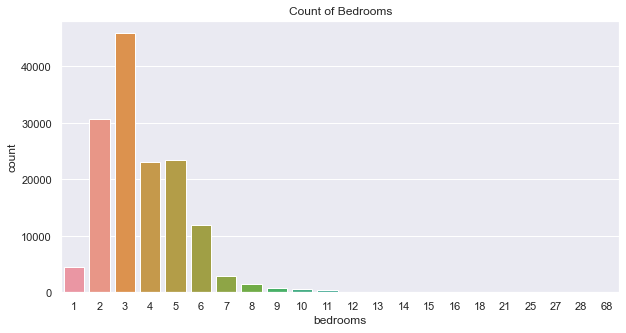

In [30]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="bedrooms", data=pp_data).set_title('Count of Bedrooms')
plt.show()

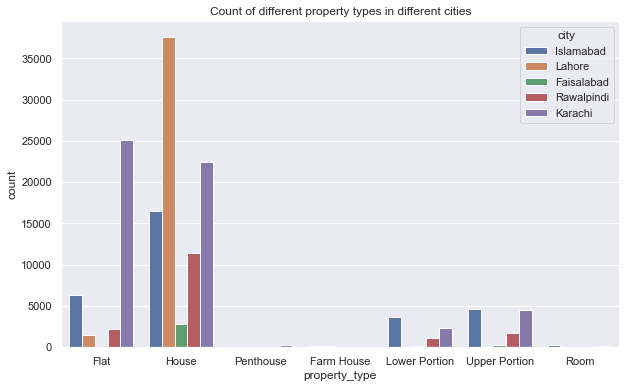

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='property_type',data=pp_data,ax=ax,hue='city').set_title('Count of different property types in different cities')
plt.show()

In [32]:
cities = pp_data.city.unique().tolist()
for i in cities:
    print("Numer of houses ads for " + i+ " city:",len(pp_data[pp_data['city']==i].index))

Numer of houses ads for Islamabad city: 31651
Numer of houses ads for Lahore city: 39425
Numer of houses ads for Faisalabad city: 3223
Numer of houses ads for Rawalpindi city: 16503
Numer of houses ads for Karachi city: 54816


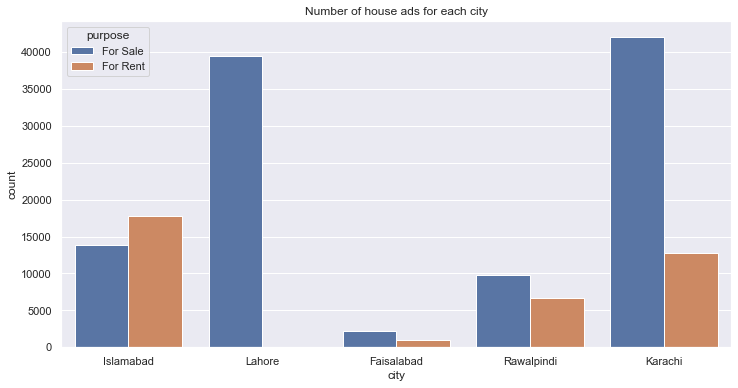

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="city", data=pp_data,hue='purpose').set_title('Number of house ads for each city')
plt.show()

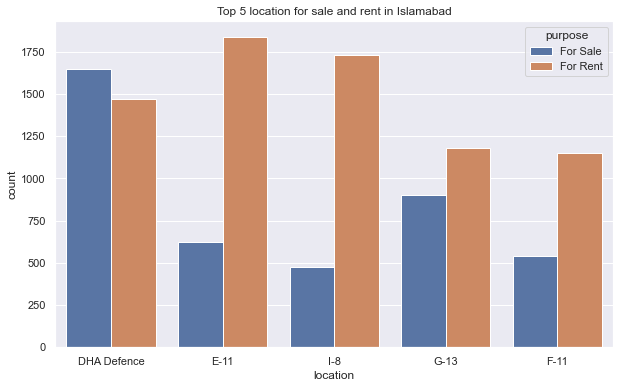

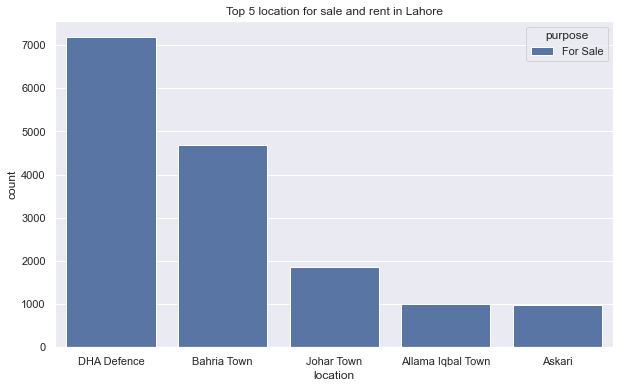

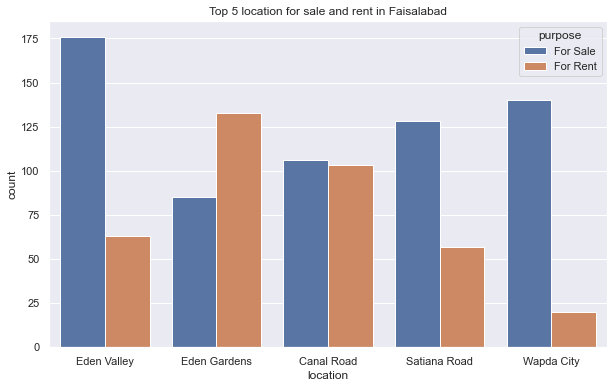

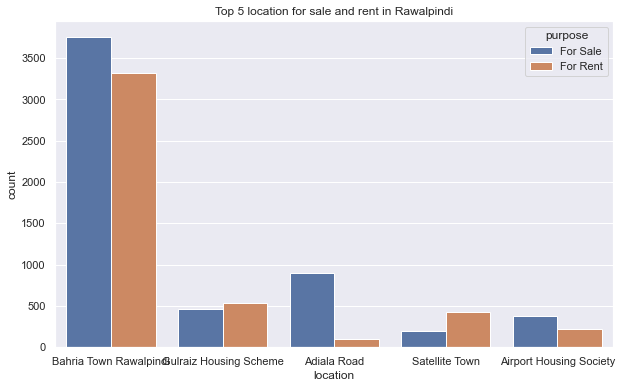

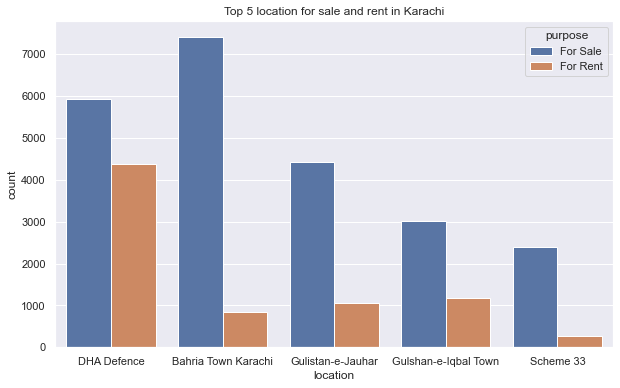

In [34]:
for i in cities:
    fig, ax = plt.subplots(figsize=(10,6))
    city_data = pp_data[pp_data['city']==i]
    sns.countplot(x='location',data=city_data,ax=ax,order=city_data.location.value_counts().iloc[:5].index,hue="purpose")
    plt.title("Top 5 location for sale and rent in "+i)
    plt.show()

In [35]:
for_sale = pp_data[pp_data['purpose'] == 'For Sale']
for_rent = pp_data[pp_data['purpose'] == 'For Rent']

print("Average Sales price for all countries in Rupees: ",int(for_sale.price.mean()))
print("Average Rent price for all countries in Rupees: ",int(for_rent.price.mean()))

Average Sales price for all countries in Rupees:  24636649
Average Rent price for all countries in Rupees:  93488


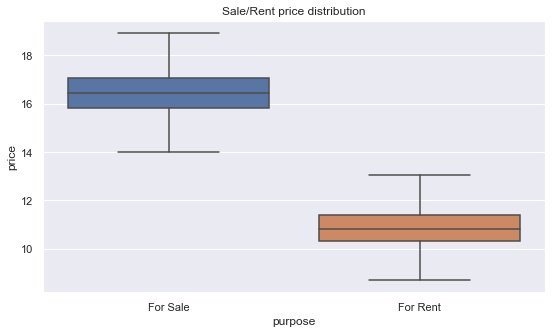

In [36]:
fig, ax = plt.subplots(figsize=(9,5))
sns.boxplot(x=pp_data.purpose,y=np.log(pp_data.price),ax=ax,showfliers=False).set_title('Sale/Rent price distribution')
plt.show()

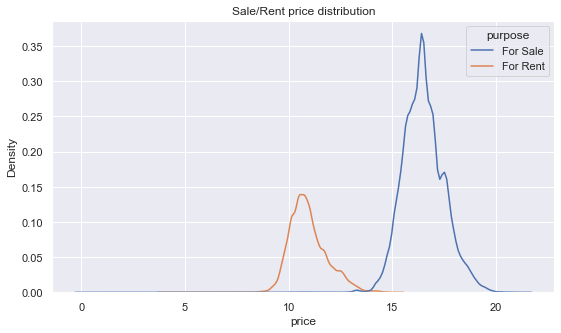

In [37]:
fig, ax = plt.subplots(figsize=(9,5))
sns.kdeplot(x=np.log(pp_data.price),hue=pp_data.purpose,ax=ax)
plt.title('Sale/Rent price distribution')
plt.show()

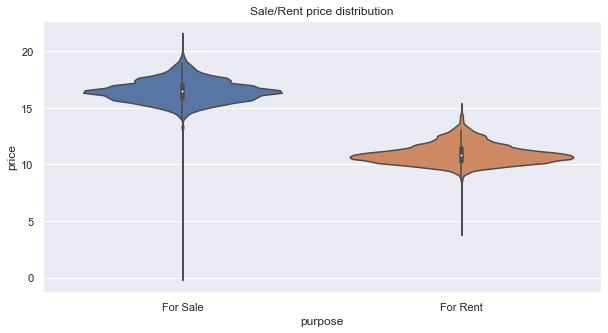

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x=pp_data.purpose,y=np.log(pp_data.price),ax=ax).set_title('Sale/Rent price distribution')
plt.show()

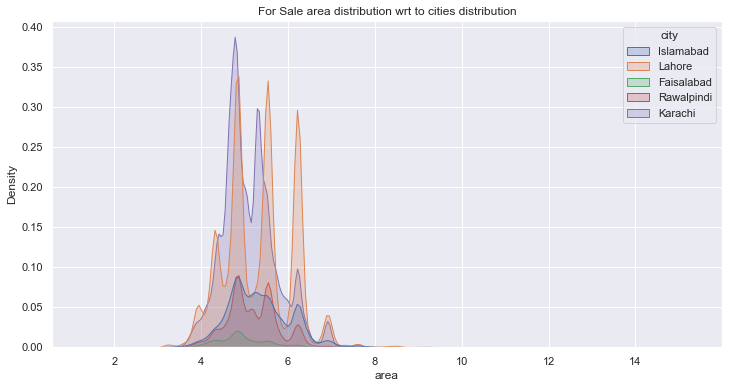

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_sale.area),ax=ax,hue=for_sale.city,shade=True)
plt.title('For Sale area distribution wrt to cities distribution')
plt.show()

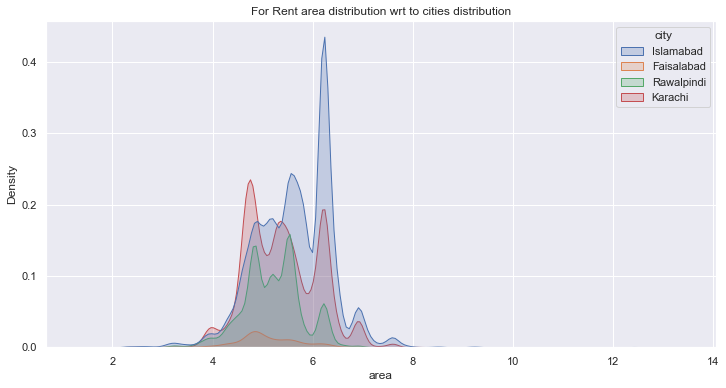

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_rent.area),ax=ax,hue=for_rent.city,shade=True)
plt.title('For Rent area distribution wrt to cities distribution')
plt.show()

In [41]:
for i in cities:
    print("Average Sale Price for " +i+ " city: ",for_sale[for_sale['city'] == i].price.mean())

Average Sale Price for Islamabad city:  30050306.7273055
Average Sale Price for Lahore city:  24567814.027875714
Average Sale Price for Faisalabad city:  13781588.499550764
Average Sale Price for Rawalpindi city:  15354048.929448787
Average Sale Price for Karachi city:  25663633.343427867


In [42]:
for i in cities:
    print("Average Rent Price for " +i+ " city: ",for_rent[for_rent['city'] == i].price.mean())

Average Rent Price for Islamabad city:  109771.49836913733
Average Rent Price for Lahore city:  nan
Average Rent Price for Faisalabad city:  44079.31795386159
Average Rent Price for Rawalpindi city:  42902.690920024055
Average Rent Price for Karachi city:  101055.5450684285


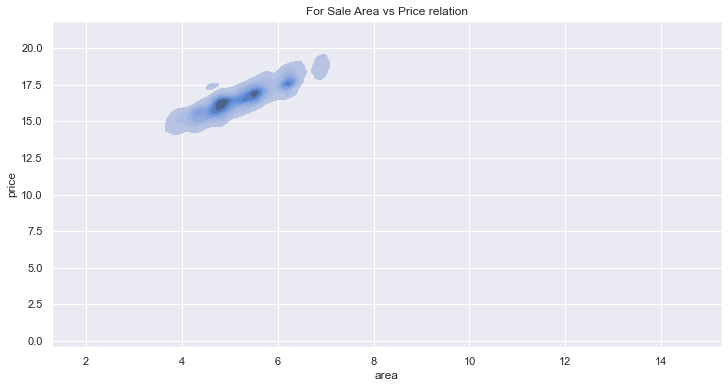

In [43]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_sale.area),y=np.log(for_sale.price),ax=ax,shade=True)
plt.title('For Sale Area vs Price relation')
plt.show()

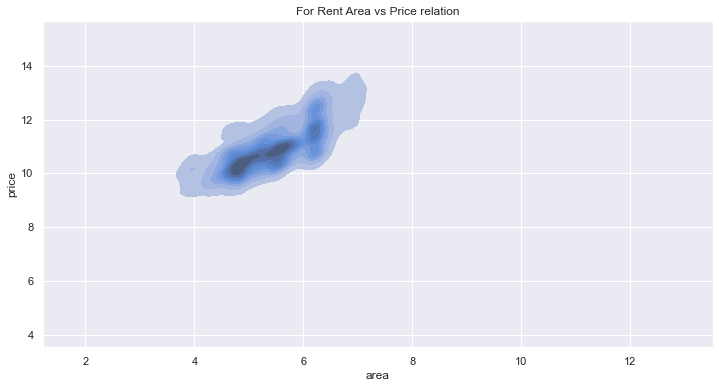

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_rent.area),y=np.log(for_rent.price),ax=ax,shade=True)
plt.title('For Rent Area vs Price relation')
plt.show()

In [45]:
print("Number of entries per year:")
pp_data['date_added'].dt.year.value_counts()

Number of entries per year:


2019    134585
2018     11033
Name: date_added, dtype: int64

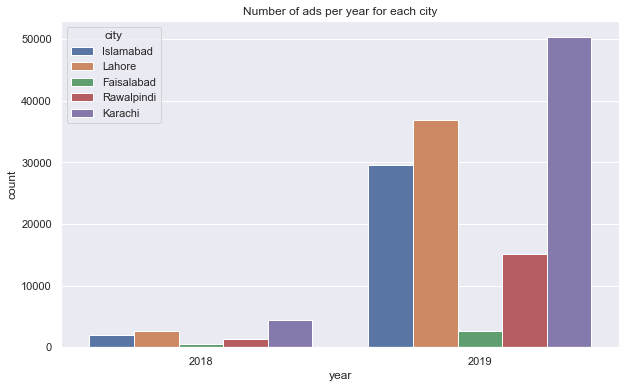

In [46]:
pp_data['year'] = pp_data['date_added'].dt.year
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="year", data=pp_data,hue="city").set_title('Number of ads per year for each city')
plt.show()

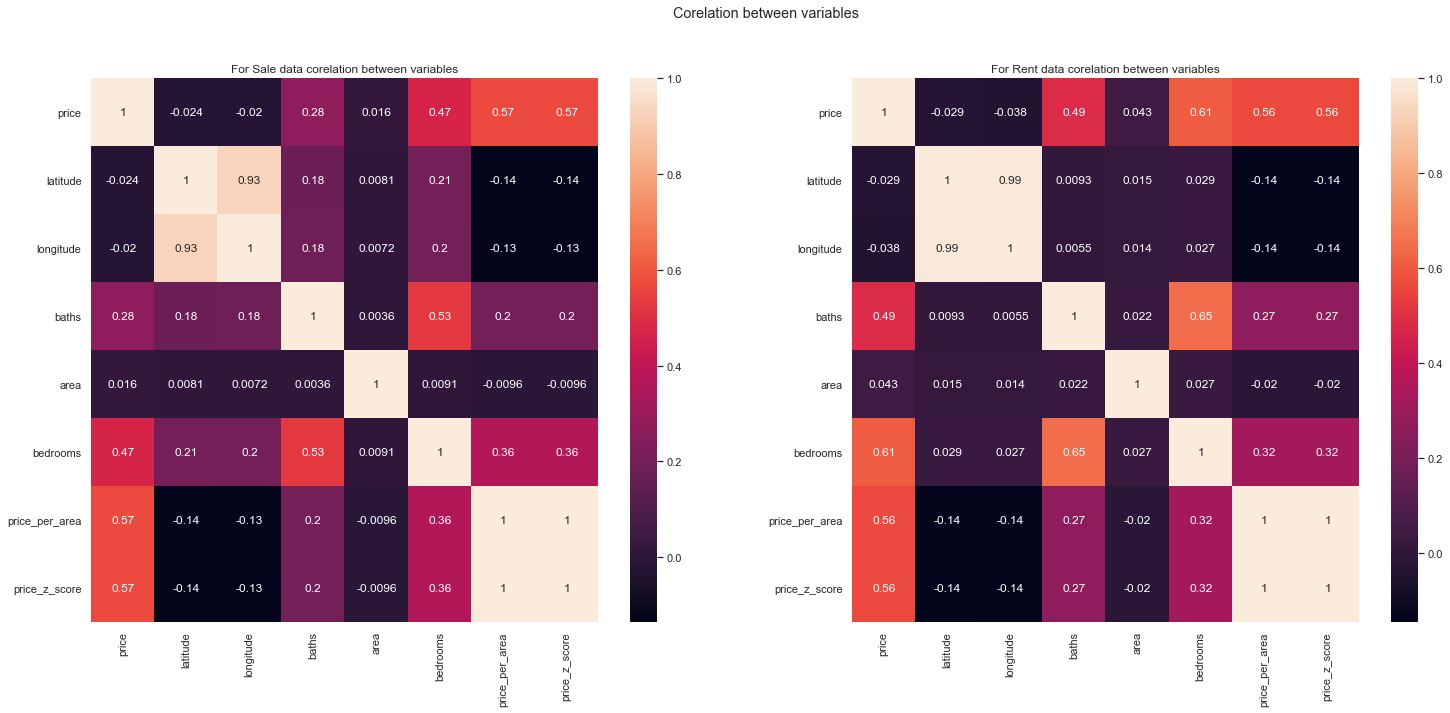

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25,10))
sns.heatmap(for_sale.corr(),annot=True,ax=ax1).set_title('For Sale data corelation between variables')
sns.heatmap(for_rent.corr(),annot=True,ax=ax2).set_title('For Rent data corelation between variables')
plt.suptitle('Corelation between variables')
plt.show()

# Questions and Analysis

In [48]:
pp_data = pp_data.drop(pp_data[(pp_data['property_type'] == "Room") | (pp_data['property_type'] == "Penthouse") |  (pp_data['property_type'] == "Farm House")].index)
pp_data['property_type'][pp_data['property_type'] =='Upper Portion'] = "Portion"
pp_data['property_type'][pp_data['property_type'] == 'Lower Portion'] = "Portion"

<ipython-input-48-941d64eb9f9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_data['property_type'][pp_data['property_type'] =='Upper Portion'] = "Portion"
<ipython-input-48-941d64eb9f9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_data['property_type'][pp_data['property_type'] == 'Lower Portion'] = "Portion"


## Q1) Difference in property type across sale and rent

### Ad posted for different property types and purposes

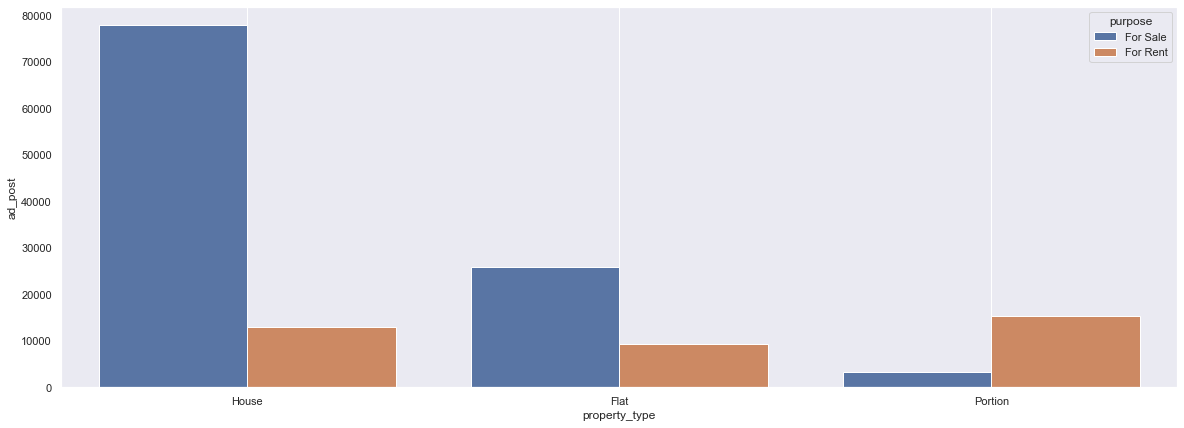

In [49]:
relevant_data = pp_data[['province_name', 'price', 'price_per_area', 'city', 'purpose', 'property_type', 'date_added', 'area']].copy()

relevant_data['month'] = pd.DatetimeIndex(pp_data['date_added']).month
relevant_data['year'] = pd.DatetimeIndex(pp_data['date_added']).year
relevant_data['date'] = pd.to_datetime(relevant_data['month'].astype(str) + "-"+ relevant_data['year'].astype(str))
relevant_data['ad_post'] = 1


relevant_data.sort_values(by = ['date_added'], inplace = True)
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot = sns.barplot(x = 'property_type', y = 'ad_post', hue = 'purpose', estimator = np.sum, data = relevant_data, ax = ax)
#plot.set(yscale = 'log')
plt.grid()
plt.show()

In [50]:
print(relevant_data.head(2))

      province_name     price  price_per_area    city   purpose property_type  \
12808        Punjab  26000000   104000.000000  Lahore  For Sale         House   
12135        Punjab  46500000    66428.571429  Lahore  For Sale         House   

      date_added   area  month  year       date  ad_post  
12808 2018-08-05  250.0      8  2018 2018-08-01        1  
12135 2018-08-05  700.0      8  2018 2018-08-01        1  


### Property type for different cities

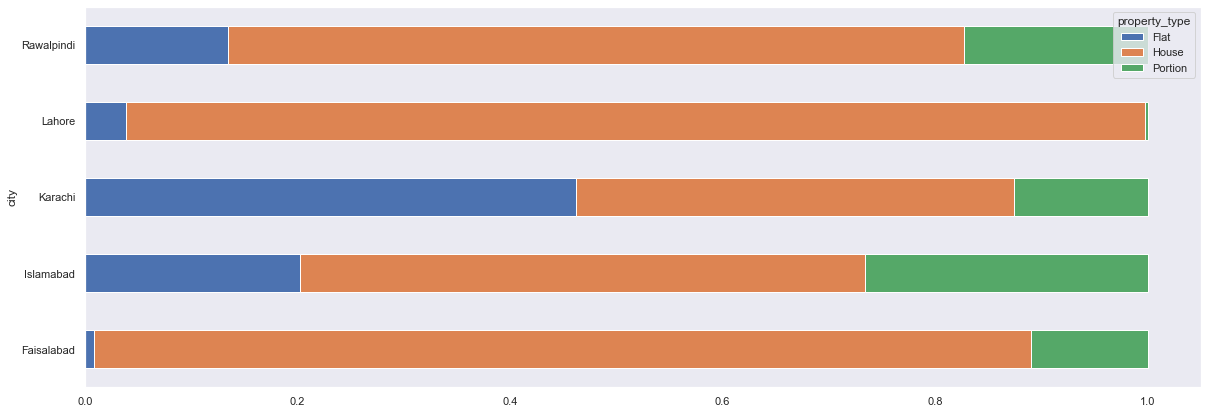

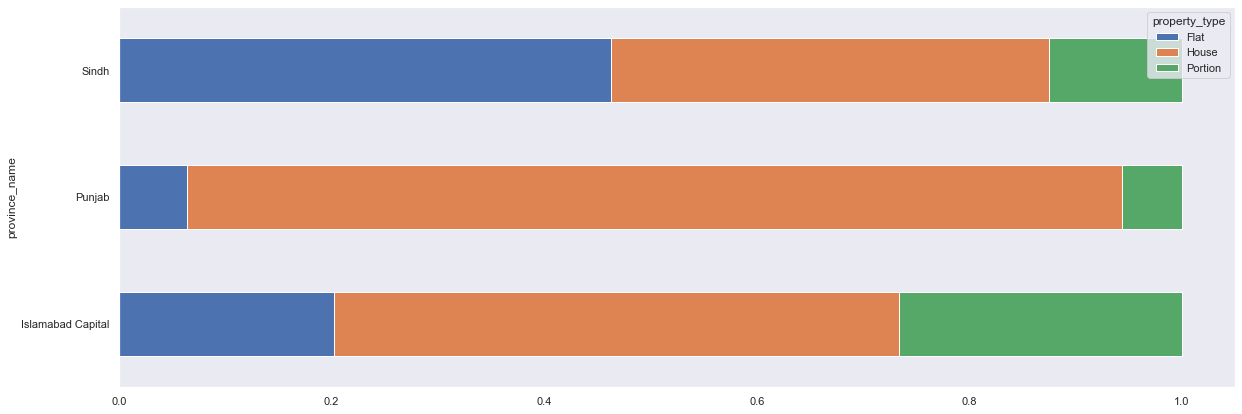

In [51]:
df_plot = relevant_data.groupby(['property_type', 'city']).size().reset_index().pivot(columns='property_type', index='city', values=0)
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.loc[:,"Flat":"Portion"].div(df_plot["sum"], axis=0)
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot.plot(kind='barh', stacked=True, ax = ax)
ax.grid()

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot = relevant_data.groupby(['property_type', 'province_name']).size().reset_index().pivot(columns='property_type', index='province_name', values=0)
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.loc[:,"Flat":"Portion"].div(df_plot["sum"], axis=0)
df_plot.plot(kind='barh', stacked=True, ax = ax)
ax.grid()
plt.show()

### Property type for different provinces

Index(['property_type', 'province_name', 'For Rent', 'For Sale'], dtype='object', name='purpose')


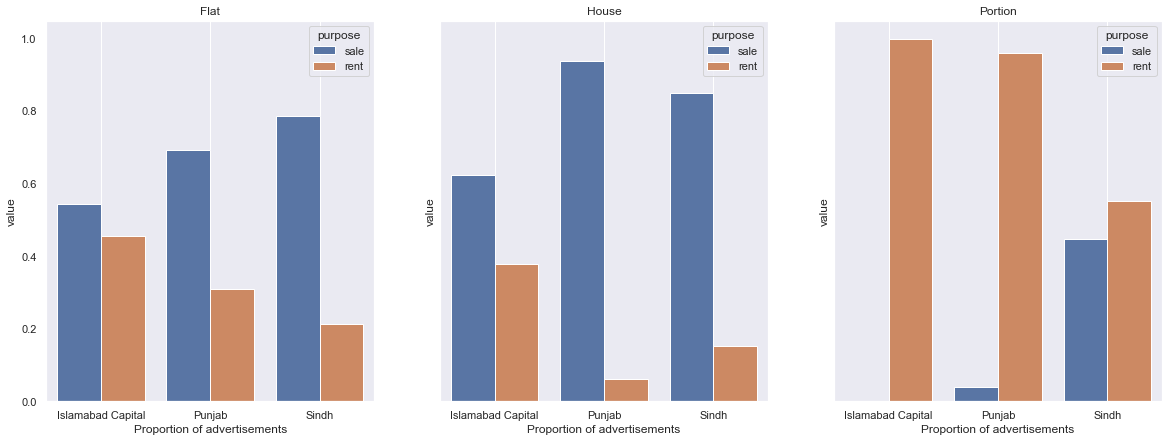

In [52]:
df_plot = relevant_data.groupby(['property_type', 'province_name', 'purpose']).size().reset_index()

dfout = df_plot.set_index(['property_type','province_name','purpose']).unstack()[0].reset_index()
print(dfout.columns)
dfout["sum"] = dfout.sum(axis=1)
dfout['sale'] = dfout['For Sale']/dfout['sum']
dfout['rent'] = dfout['For Rent']/dfout['sum']

df = pd.melt(dfout, id_vars=['property_type', 'province_name'], value_vars=['sale', 'rent'])

fig, ax = plt.subplots(1, 3, sharey = True, sharex = True, figsize = (20, 7))
count = 0
for i in df_plot['property_type'].unique():
    sns.barplot(x = 'province_name', y = 'value', hue = 'purpose', data = df[df['property_type'] == i], ax = ax[count])
    ax[count].set_title(i)
    ax[count].set_xlabel("Proportion of advertisements")
    ax[count].grid()
    count += 1
    





## Q2) Analyzing the recovery period of rent with respect to the selling price of a property

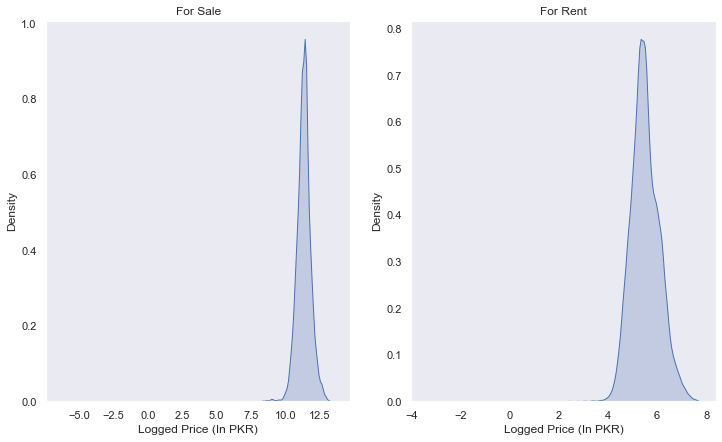

In [53]:
# Share a Y axis with each row of subplots
fig, ax = plt.subplots(1, 2, figsize = (12, 7))

sns.kdeplot(np.log(pp_data['price_per_area'][pp_data['purpose'] == 'For Sale']), shade = True, ax = ax[0], label = "Sale")
sns.kdeplot(np.log(pp_data['price_per_area'][pp_data['purpose'] == 'For Rent']), shade = True, ax = ax[1], label = "Rent")
ax[0].set_xlabel("Logged Price (In PKR)")
ax[0].title.set_text("For Sale")
ax[1].set_xlabel("Logged Price (In PKR)")
ax[1].title.set_text("For Rent")
ax[0].grid();ax[1].grid();
plt.show()

In [54]:
## computing rent per area
location_sale_rent = {}
for i, row in pp_data.iterrows():
    location = row['unique_location'].strip().lower()
    price_per_area = row['price_per_area']
    purpose = row['purpose']
    if location not in location_sale_rent:
        location_sale_rent[location] = {'For Sale':[], 'For Rent':[]}
    location_sale_rent[location][purpose].append(price_per_area)

mean_loc_sale_rent = {}

#computing mean rent per area
for i in location_sale_rent:
    for_sale = location_sale_rent[i]['For Sale']
    for_rent = location_sale_rent[i]['For Rent']
    if (len(for_sale) + len(for_rent)) >= 0 and len(for_sale) > 0 and len(for_rent) > 0:
        if i not in mean_loc_sale_rent:
            mean_loc_sale_rent[i] = {'sale': 0, 'rent' : 0, 'city':''}
        mean_loc_sale_rent[i]['sale'] = np.mean(for_sale)
        mean_loc_sale_rent[i]['rent'] = np.mean(for_rent)
        mean_loc_sale_rent[i]['city'] = i.split()[-1].capitalize()
        #for a partiular location, the dictionary holds the mean rent and sale price
            
print(len(mean_loc_sale_rent))
mean_location = pd.DataFrame.from_dict(mean_loc_sale_rent, orient = 'index')
mean_location['ratio_per_month'] = np.floor(mean_location['sale'] / mean_location['rent'], dtype = 'float64')
mean_location['ratio_per_year'] = (mean_location['ratio_per_month']/12)



mean_location.head(10)    

545


,sale,rent,city,ratio_per_month,ratio_per_year
g-10 islamabad,127055.868629,276.275888,Islamabad,459.0,38.250000
e-11 islamabad,109492.071479,330.342832,Islamabad,331.0,27.583333
g-15 islamabad,72481.624132,192.703404,Islamabad,376.0,31.333333
bani gala islamabad,60754.509271,151.817360,Islamabad,400.0,33.333333
dha defence islamabad,62812.532723,158.795754,Islamabad,395.0,32.916667
ghauri town islamabad,69987.972311,169.681040,Islamabad,412.0,34.333333
korang town islamabad,64632.491484,152.521836,Islamabad,423.0,35.250000
diplomatic enclave islamabad,194558.954809,822.279687,Islamabad,236.0,19.666667
b-17 islamabad,62074.557139,181.678173,Islamabad,341.0,28.416667
g-11 islamabad,123151.002533,280.434778,Islamabad,439.0,36.583333


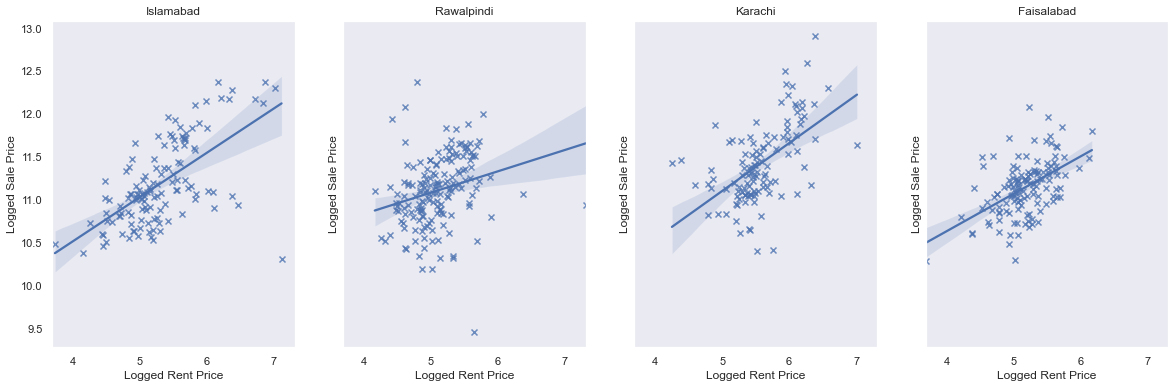

In [55]:
mean_location['logged_sale'] = np.log(mean_location['sale'])
mean_location['logged_rent'] = np.log(mean_location['rent'])


cities = list(set(mean_location['city']))
fig, ax = plt.subplots(1, 4, sharex = True, sharey = True, figsize = (20, 6))
count = 0
for i in cities:
    #sns.kdeplot(data = mean_location[['logged_rent', 'logged_sale']][mean_location['city'] == i], ax = ax[count], thresh = 0.0)
    #sns.scatterplot( x = mean_location['logged_sale'][mean_location['city'] == i], y = mean_location['logged_rent'][mean_location['city'] == i], ax = ax[count])
    sns.regplot( y = mean_location['logged_sale'][mean_location['city'] == i], x = mean_location['logged_rent'][mean_location['city'] == i], ax = ax[count], marker = 'x')
    ax[count].set_title(i)
    ax[count].set_xlabel("Logged Rent Price")
    ax[count].set_ylabel("Logged Sale Price")
    ax[count].grid()
    count += 1
plt.show()
    

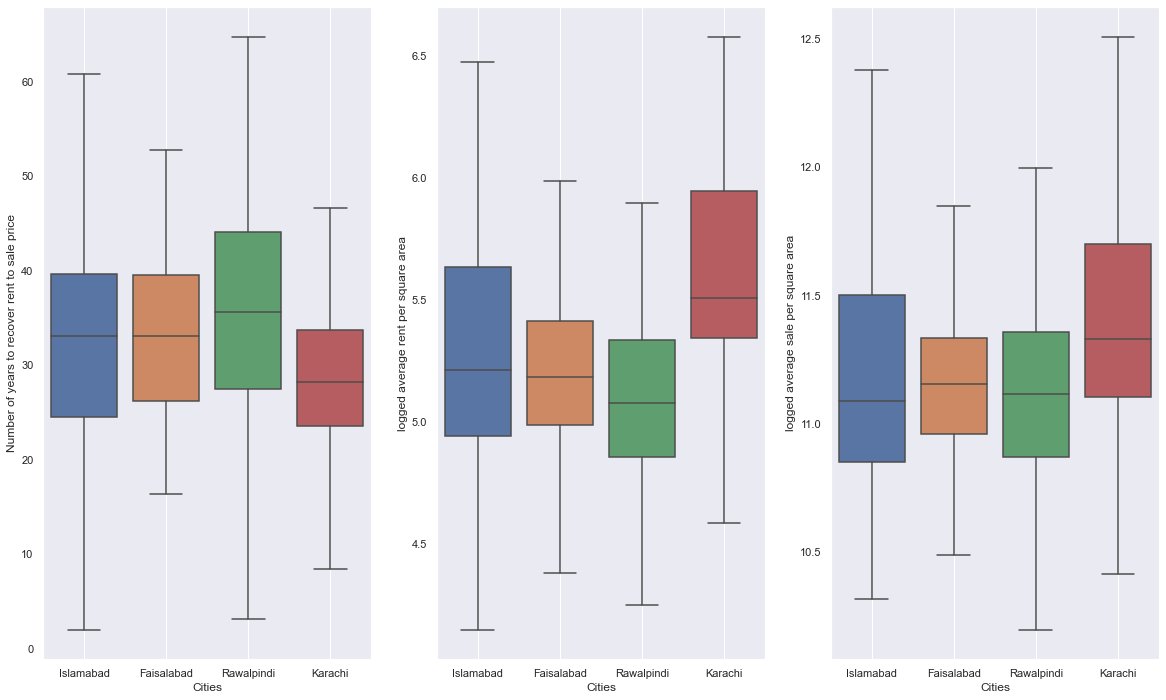

In [56]:
mean_location = mean_location.drop(mean_location[(mean_location['ratio_per_year'] < 2) | (mean_location['ratio_per_year'] > 80)].index)


fig, ax = plt.subplots(1, 3,figsize = (20, 12))
sns.boxplot(y = 'ratio_per_year', x = 'city', data = mean_location, showfliers=False, ax = ax[0])
ax[0].set_xlabel('Cities')
ax[0].set_ylabel("Number of years to recover rent to sale price")
ax[0].grid()

sns.boxplot(y = np.log(mean_location['rent']), x = mean_location['city'], showfliers=False, ax = ax[1])
ax[1].set_xlabel('Cities')
ax[1].set_ylabel("logged average rent per square area")
ax[1].grid()

sns.boxplot(y = np.log(mean_location['sale']), x = mean_location['city'], showfliers=False, ax = ax[2])
ax[2].set_xlabel('Cities')
ax[2].set_ylabel("logged average sale per square area")
ax[2].grid()

plt.show()

### Q3) The factor on which price depends the most

In [57]:
relevant_data = pp_data[['price', 'price_per_area', 'unique_location', 'city', 'area', 'bedrooms', 'purpose', 'property_type']].copy()
sale = relevant_data[relevant_data['purpose'] == 'For Sale']
rent = relevant_data[relevant_data['purpose'] == 'For Rent']

<ipython-input-58-9e2ee7d71ea3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale['price'] = min_max_scaler.fit_transform(np.reshape(sale['price'].values, (-1, 1)))
<ipython-input-58-9e2ee7d71ea3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['price'] = min_max_scaler.fit_transform(np.reshape(rent['price'].values, (-1, 1)))
<ipython-input-58-9e2ee7d71ea3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

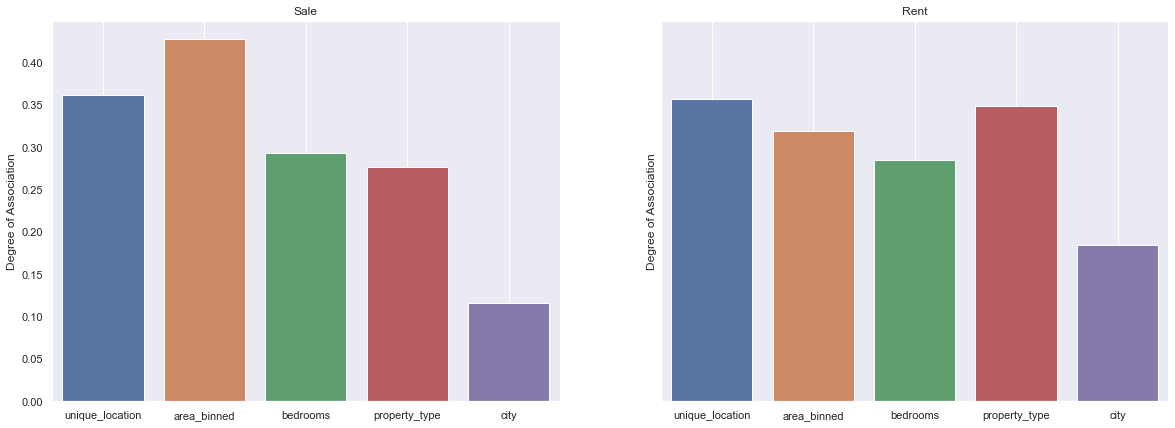

In [58]:
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
import scipy.stats as ss

#going with standard because we have massive outliears :(
min_max_scaler = preprocessing.StandardScaler()

sale['price'] = min_max_scaler.fit_transform(np.reshape(sale['price'].values, (-1, 1)))
rent['price'] = min_max_scaler.fit_transform(np.reshape(rent['price'].values, (-1, 1)))


sale['price_per_area'] = min_max_scaler.fit_transform(np.reshape(sale['price_per_area'].values, (-1, 1)))
rent['price_per_area'] = min_max_scaler.fit_transform(np.reshape(rent['price_per_area'].values, (-1, 1)))

sale['area'] = min_max_scaler.fit_transform(np.reshape(sale['area'].values, (-1, 1)))
rent['area'] = min_max_scaler.fit_transform(np.reshape(rent['area'].values, (-1, 1)))

                     
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(sale['price'].values, (-1, 1)))
sale['price_binned'] = binned
#print(sale['price_binned'].value_counts())

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(sale['area'].values, (-1, 1)))
sale['area_binned'] = binned

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(rent['price'].values, (-1, 1)))
rent['price_binned'] = binned
#print(sale['price_binned'].value_counts())

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(rent['area'].values, (-1, 1)))
rent['area_binned'] = binned


#FTW https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

dfs = [sale, rent]
labels = ['Sale', 'Rent']
columns = ['unique_location', 'area_binned', 'bedrooms', 'property_type', 'city']


fig, ax = plt.subplots(1, 2, sharey = True, figsize = (20, 7))

for i in range(2):
    scores = []
    a = dfs[i]['price_binned']
    label = labels[i]
    for b in columns:
        b = dfs[i][b]
        scores.append(cramers_v(pd.crosstab(a, b).values))
        
    sns.barplot(x = columns, y = scores, ax = ax[i])
    ax[i].grid()
    ax[i].set_title(label)
    ax[i].set_ylabel("Degree of Association") 

### Q4) Difference between price across cities

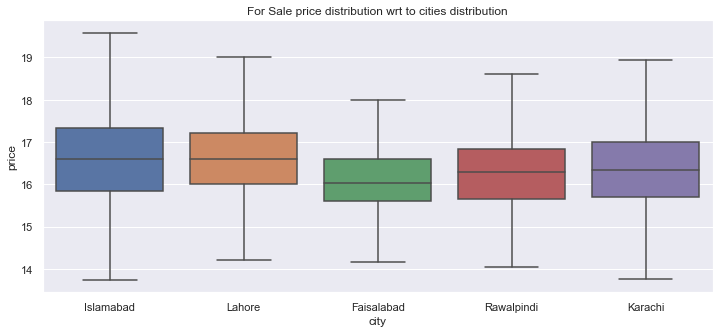

In [61]:
for_sale = pp_data[pp_data['purpose'] == 'For Sale']
for_rent = pp_data[pp_data['purpose'] == 'For Rent']

fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=for_sale.city,y=np.log(for_sale.price),ax=ax,showfliers=False).set_title('For Sale price distribution wrt to cities distribution')
plt.show()

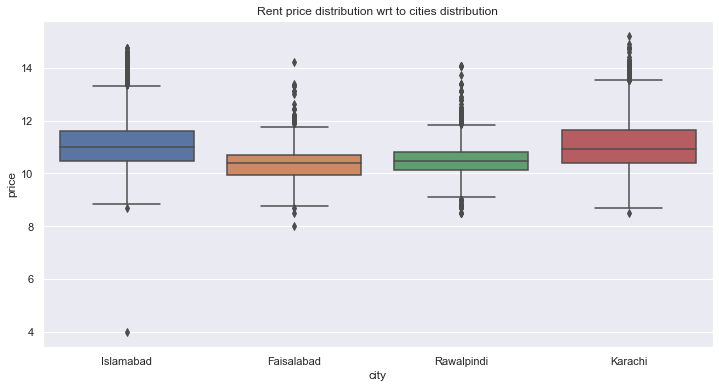

In [62]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x=for_rent.city,y=np.log(for_rent.price),ax=ax).set_title('Rent price distribution wrt to cities distribution')
plt.show()

## Q5 Trend for property type changing with time

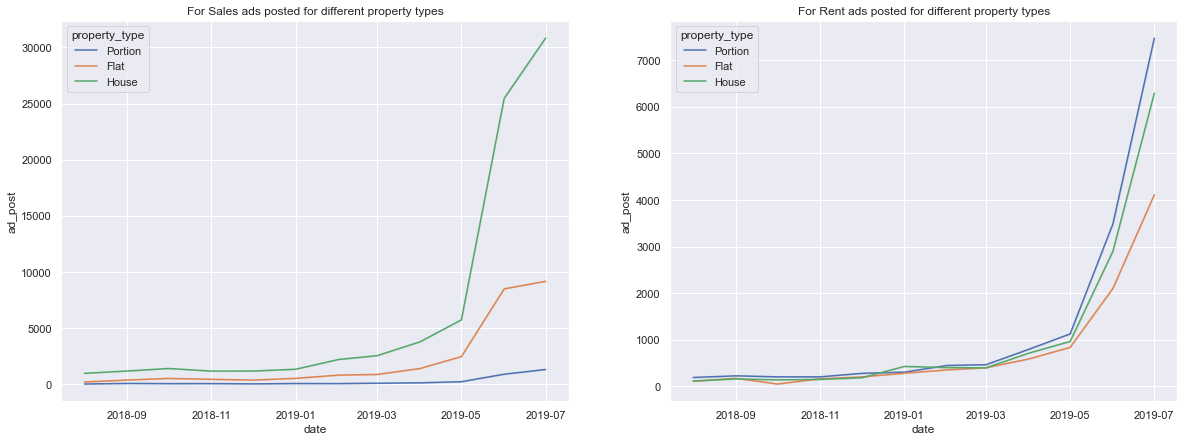

In [63]:
pp_data['date_added'] = pd.to_datetime(pp_data['date_added'])


relevant_data = pp_data[['price', 'price_per_area', 'city', 'purpose', 'property_type', 'date_added']].copy()

relevant_data['month'] = pd.DatetimeIndex(pp_data['date_added']).month
relevant_data['year'] = pd.DatetimeIndex(pp_data['date_added']).year
relevant_data['date'] = pd.to_datetime(relevant_data['month'].astype(str) + "-"+ relevant_data['year'].astype(str))
relevant_data['ad_post'] = 1


relevant_data.sort_values(by = ['date_added'], inplace = True)

sale = relevant_data[relevant_data['purpose'] == 'For Sale']
rent = relevant_data[relevant_data['purpose'] == 'For Rent']

hue_order = list(set(pp_data['property_type']))

fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.lineplot(x = 'date', y = 'ad_post', data = sale, hue = 'property_type', hue_order = hue_order, estimator = np.sum, markers = True, ax = ax[0]).set_title('For Sales ads posted for different property types')
plt.grid()

sns.lineplot(x = 'date', y = 'ad_post', data = rent, hue = 'property_type', hue_order = hue_order, estimator = np.sum, markers = True, ax = ax[1]).set_title('For Rent ads posted for different property types')
plt.grid()
plt.show()

##THIS MAKES US REALIZE THAT OUR ANALYSIS GOING FORWARD SHOULD BE TIME INDEPENDENT

types = list(set(relevant_data['property_type']))

sales_property_ratio = {}

for i, row in sale.iterrows():
    date = row['date']
    ptype = row['property_type']
    if date not in sales_property_ratio:
        sales_property_ratio[date] = {i:0 for i in types}
    if ptype in types:
        sales_property_ratio[date][ptype] += 1
    else:
        sales_property_ratio[date]["Other"] += 1
    
    
for i in sales_property_ratio:
    total = sum(list(sales_property_ratio[i].values()))
    for j in types:
        sales_property_ratio[i][j] /= total

    
rent_property_ratio = {}

for i, row in rent.iterrows():
    date = row['date']
    ptype = row['property_type']
    if date not in rent_property_ratio:
        rent_property_ratio[date] = {i:0 for i in types}
    if ptype in types:
        rent_property_ratio[date][ptype] += 1
    else:
        rent_property_ratio[date]["Other"] += 1
    
    
for i in rent_property_ratio:
    total = sum(list(rent_property_ratio[i].values()))
    for j in types:
        rent_property_ratio[i][j] /= total
    
        


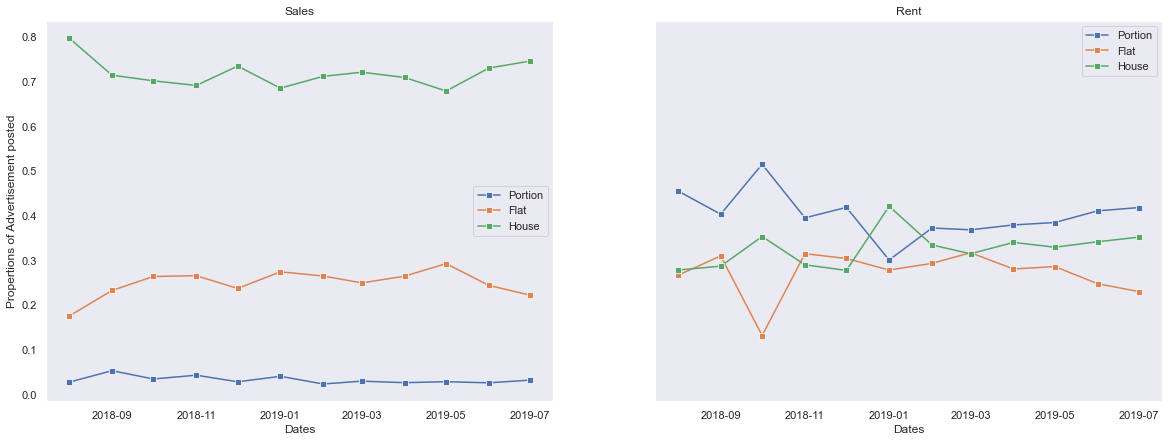

In [64]:
sales_property = pd.DataFrame.from_dict(sales_property_ratio, orient = 'index')
rents_property = pd.DataFrame.from_dict(rent_property_ratio, orient = 'index')
dfs = [(sales_property, "Sales"), (rents_property, "Rent")]
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20, 7))

for i in range(2):
    data = dfs[i][0]
    for ptype in types:
        if ptype == "Other":
            continue
        sns.lineplot(x = data.index, y = (data[ptype]), label = ptype, ax = ax[i], marker = 's')
    ax[i].legend()
    ax[i].grid()
    ax[i].set_title(dfs[i][1])
    ax[i].set_xlabel("Dates")
    ax[i].set_ylabel("Propertions of Advertisement posted")
plt.show()